In [311]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [312]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import sys
sys.path.append("../src") if "../src" not in sys.path else None # avoid adding multiple relave paths to sys.path

In [313]:
from Agent import Agent, generate_trajectory
from Environment import Rectangle

In [314]:
boxsize=(2.2, 2.2)
origo=(0,0)
soft_boundary=0.2

In [315]:
env = Rectangle(boxsize=boxsize, soft_boundary=soft_boundary)
avoid_walls = env.avoid_walls
#env.add_wall("free_wall1", {"bias":np.array([0.4,0.4]),"slope":np.array([0.8,0.8])})
#env.add_wall("free_wall2", {"bias":np.array([0.4,1.5]),"slope":np.array([0.8,0])})
env.add_wall(name="free_wall1", bias=np.array([0.4,0.4]),slope=np.array([0.8,0.8]),t=[0,1])
env.add_wall(name="free_wall2", bias=np.array([0.4,1.5]),slope=np.array([0.8,0]),t=[0,1])

Singular matrix
Singular matrix
Singular matrix
Singular matrix


In [316]:
ag = Agent(np.pi, np.array([[0.5,0.51]]))

for i in range(6000):
    ag.step(avoid_walls)

print("------------")
print(ag.speeds)
print(ag.hds)
print(ag.velocities)
print(ag.positions.shape)

------------
[0.         0.01832989 0.01561014 ... 0.02396037 0.00414723 0.01004966]
[3.14159265 3.11662144 2.96276968 ... 1.48901389 1.57982977 1.44720601]
[[-0.00000000e+00  0.00000000e+00]
 [-1.83241785e-02  4.57672059e-04]
 [-1.53612195e-02  2.77659856e-03]
 ...
 [ 1.95735404e-03  2.38802904e-02]
 [-3.74632431e-05  4.14706006e-03]
 [ 1.23888151e-03  9.97300821e-03]]
(6001, 2)


In [317]:
gen = generate_trajectory(env,seq_len=6000)

In [318]:
ag = next(gen)[-1]

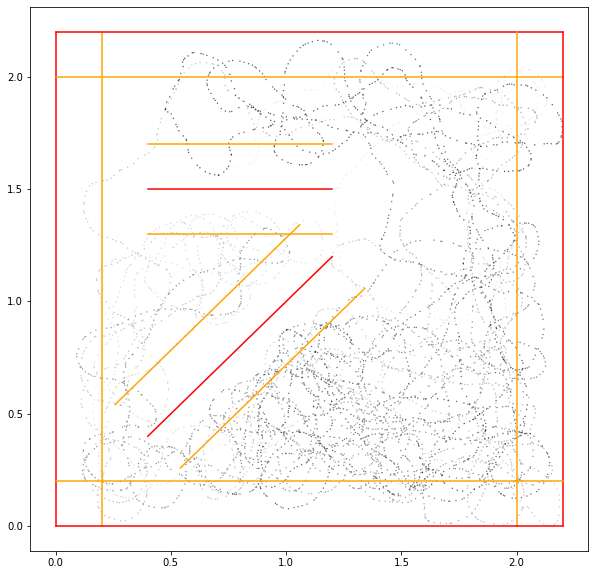

In [319]:
fig,axs=plt.subplots(figsize=(10,10))
env.plot_board(axs)
        
# plot animal path
n=ag.positions.shape[0]
c=np.zeros((n,4))
c[:,-1] = 1
c[:,:-1] = 0.9-np.linspace(0,0.9,n)[:,None]
axs.scatter(*ag.positions.T,s=0.1,c=c)#[(0,0,0,1)]*100001)

# Testing whether numpy.append or list.append is faster

In [93]:
from ctimeit import ctimeit

In [100]:
@ctimeit
def array_cat():
    a = np.zeros(0)
    for i in range(100000):
        a = np.append(a,i)
    
    return a

array_cat()

File "<ipython-input-100-d38cc1da07f1>", line 9, function: array_cat() used <2.150149049999527> seconds


array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
       9.9999e+04])

In [103]:
@ctimeit
def list_cat():
    a = []
    for i in range(100000):
        a.append(i)
    
    return i
array_cat()

File "<ipython-input-103-d0af6f9751c8>", line 8, function: array_cat() used <2.2002655910000612> seconds


array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
       9.9999e+04])

# Conclusion: NO DIFFERENCE